<a href="https://colab.research.google.com/github/MoronSlayer/AI-Mastery/blob/main/695_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please answer the following questions related to Machine Learning concepts: 
1. [18 points] Explain the key properties of the following concepts:  
1) supervised learning,  
2) unsupervised learning,  
3) online learning,  
4) batch learning,  
5) model-based learning,  
6) instance-based learning. 
 
Programming Problem: 
2. [42 points] In this problem, we write a program to estimate the parameters for an unknown 
polynomial using the polyfit() function of the numpy package.  
 
1) Please plot the noisy data and the polynomial you found (in the same figure). You can use any 
value of m selected from 2, 3, 4, 5, 6.  
2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m. 
3) Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm 
and plot the polynomials with the m found in 2). Discuss the impact of noise scale to the 
accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of 
noise_scale.] 
4) Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot 
the polynomials with the m found in 2). Discuss the impact of the number of samples to the 
accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of 
number_of_samples.] 

## the polynomial used is $ y = 5x + 15 x^2+2x^3$

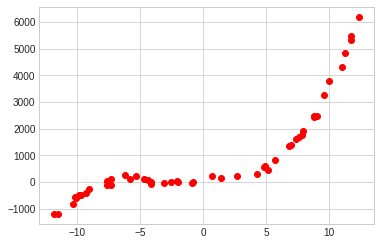

In [2]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np 
noise_scale = 100 
number_of_samples = 50 
x =  25*(np.random.rand(number_of_samples, 1) - 0.5) 
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'ro') 

reference - https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

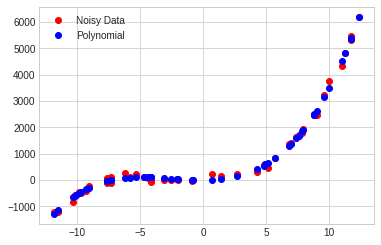

In [3]:
'''
    Q1. Please plot the noisy data and the polynomial you found (in the same figure). 
        You can use any value of m selected from 2, 3, 4, 5, 6.
        Here, m = 5
'''

x = x.ravel()
y = y.ravel()
z = np.polyfit(x, y, 5)
p = np.poly1d(z)
plt.plot(x, y, 'ro', label = 'Noisy Data')
plt.plot(x,p(x),'bo',label = 'Polynomial')
plt.legend()
plt.show()


R-squared value for m=1: 0.718680016303348


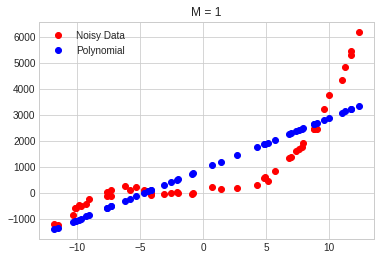

R-squared value for m=2: 0.8791547998417016


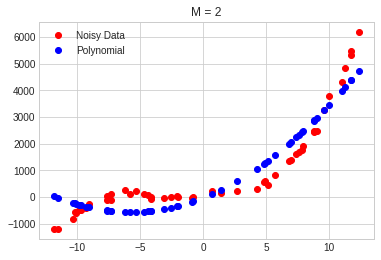

R-squared value for m=3: 0.9967051648951625


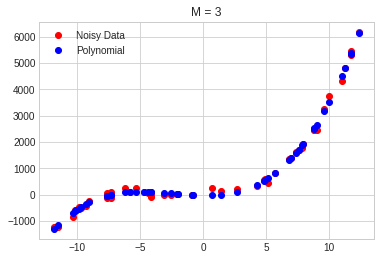

R-squared value for m=4: 0.9967854439040629


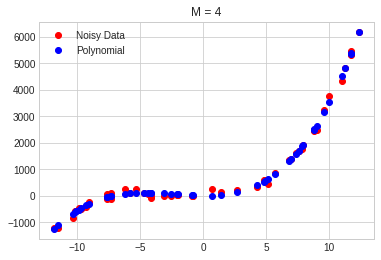

R-squared value for m=5: 0.9968516552988997


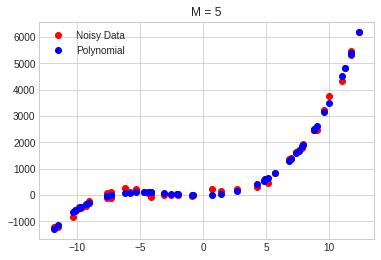

R-squared value for m=6: 0.9968542164248004


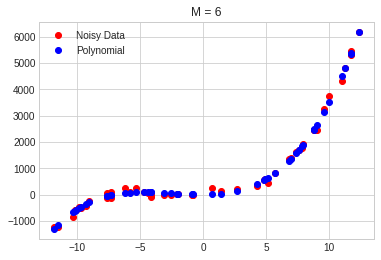

R-squared value for m=7: 0.9970748208164992


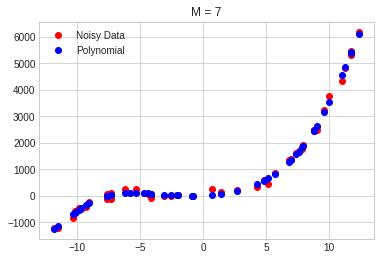

R-squared value for m=8: 0.9973397745916691


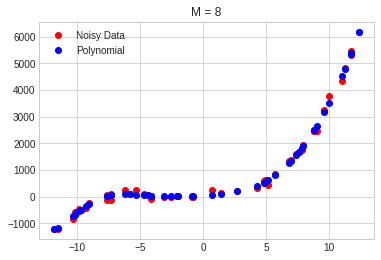

MSE:  [887934.5939691423, 381425.56502983125, 10399.538747890101, 10146.15287662896, 9937.168832132536, 9929.08511103704, 9232.78807448501, 8396.510396359756]


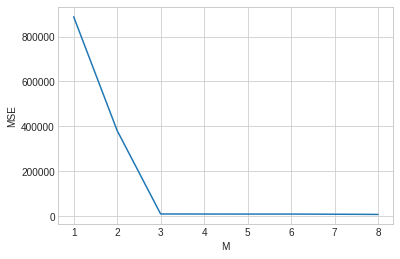

In [4]:
'''
    Q2. Plot MSE versus order m for m = 1, 2, 3, 4, 5, 6, 7, 8. 
        Identify the best choice of order m.
'''
from sklearn.metrics import r2_score
from sympy import symbols
x = x.ravel()
y = y.ravel()
m = []
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    z = np.polyfit(x, y, i)
    p = np.poly1d(z)
    m.append(((sum((y-p(x))**2)))/number_of_samples)
    plt.title(f'M = {i}')
    plt.plot(x, y, 'ro', label = 'Noisy Data')
    plt.plot(x,p(x),'bo',label = 'Polynomial')
    print(f'R-squared value for m={i}: {r2_score(y, p(x))}')
    plt.legend()
    plt.show()
print("MSE: ",m)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8],m)
plt.xlabel('M')
plt.ylabel('MSE')
plt.show()


## from the plots we can see that as we increase the order of m from m =1 to m= 8, the polynomial fits the random noisy data better and better as seen by the R-2 value and the MSE values decreasing. The ideal fit for this data is at m = 3 but it starts overfitting from then, m = 2 looks better for generalizing 

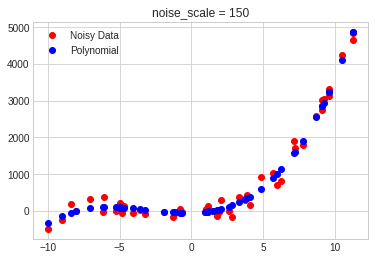

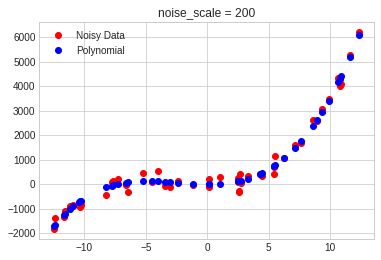

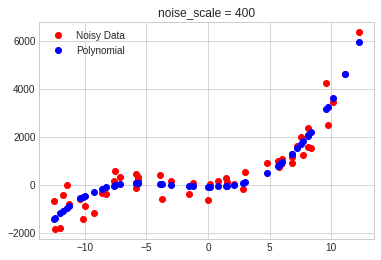

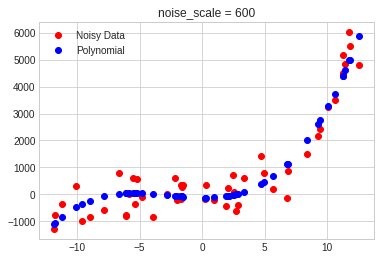

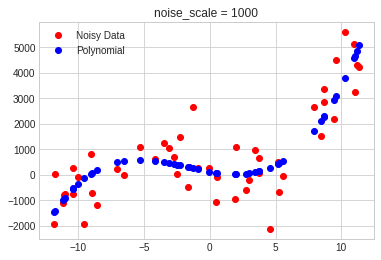

In [12]:
'''
    Q3. Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and
        plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of
        the returned parameters. You need to plot a figure like in 1) for each choice of noise_scale.
'''

for noise_scale in [150, 200, 400, 600, 1000]: 
    number_of_samples = 50
    x = 25*(np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
    x = x.ravel()
    y = y.ravel()
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.title(f'noise_scale = {noise_scale}')
    plt.plot(x, y, 'ro', label = 'Noisy Data')
    plt.plot(x,p(x),'bo',label = 'Polynomial')
    plt.legend()
    plt.show()


## As we see from the above plots, as we increase the noise scales, the data points become more scattered and move away from the polynomia, for higher noise levels the accuracy keeps decreasing 

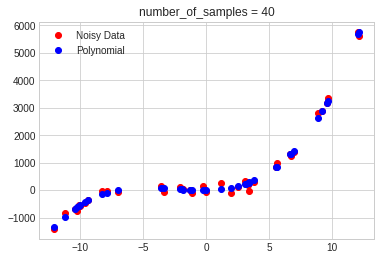

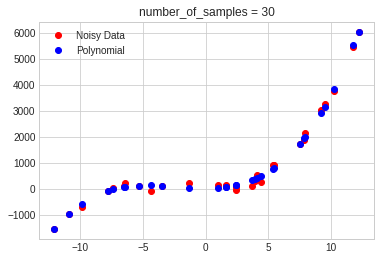

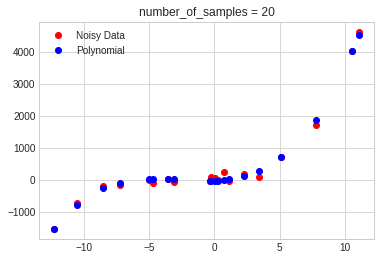

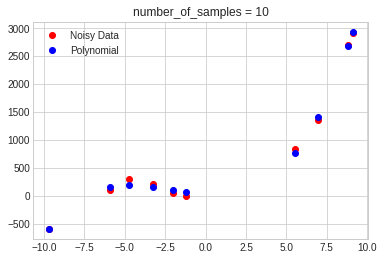

In [14]:
'''
    Q.4 Change variable number_of_samples to 40, 30, 20, 10 respectively, re-run the algorithm and plot 
        the polynomials with the m found in 2). Discuss the impact of the number of samples to the 
        accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of 
        number_of_samples.]
'''
for number_of_samples in [40, 30, 20, 10]: 
    noise_scale = 100 
    x = 25*(np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
    x = x.ravel()
    y = y.ravel()
    xp = np.linspace(-20, 5)
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.title(f'number_of_samples = {number_of_samples}')
    plt.plot(x, y, 'ro', label = 'Noisy Data')
    plt.plot(x,p(x),'bo',label = 'Polynomial')
    plt.legend()
    plt.show()

## As the sample size decreases, the polynomial is still able to fit with the lower sample space, the distribution of the samples look similar for higher and lower values